<a href="https://colab.research.google.com/github/Madhavi-sai/FML/blob/main/cross_validation_on_simpleLinearRegression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simple Linear Regression**

Importing required modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

Loading of data with the help of pandas data frame.

In [2]:
#Load the data
data = pd.read_csv("Company_data.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## **Selecting The Prediction Target**  
You can pull out a variable with dot-notation. This single column is stored in a Series, which is broadly like a DataFrame with only a single column of data.

We'll use the dot notation to select the column we want to predict, which is called the prediction target. By convention, the prediction target is called y. So the code we need to save the sales prices in the company data is as follows

In [3]:
Y = data['Sales'].values

## **Choosing "Features"**  
The columns that are inputted into our model (and later used to make predictions) are called "features." In our case, those would be the columns used to determine the sales price.
In this training example we are going to choose TV column as our feature.

In [4]:
X = data.drop("Sales", axis = 1).values
Y = data['Sales'].values
X_tv = X[:, 0]
X_radio = X[:,1]
X_newspaper = X[:,2]

In [5]:
print(type(X))
print(type(Y))
print(X.shape, Y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(200, 3) (200,)


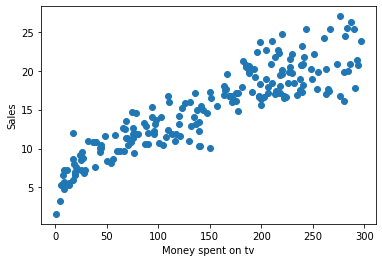

In [6]:
plt.scatter(X_tv, Y)
plt.xlabel('Money spent on tv')
plt.ylabel('Sales')
plt.show()


From the above cell money spent on tv advertisements is positively correlated with the sales of the company.

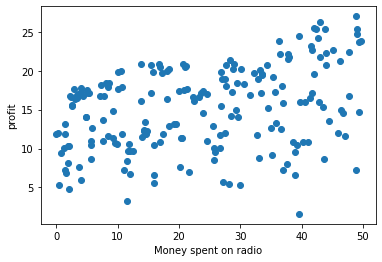

In [7]:
plt.scatter(X_radio, Y)
plt.xlabel('Money spent on radio')
plt.ylabel('profit')
plt.show()

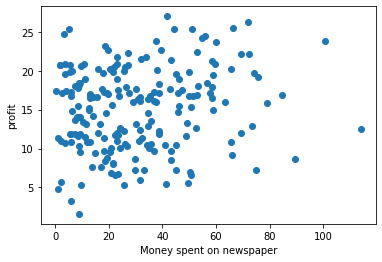

In [8]:
plt.scatter(X_newspaper, Y)
plt.xlabel('Money spent on newspaper')
plt.ylabel('profit')
plt.show()

In [9]:
Y = Y.reshape(-1, 1)
X_tv = X_tv.reshape(-1, 1)


## **Building our model**  
We will use the scikit-learn library to create our model. We create an instance of LinearRegression model with the help of existing classes, and later use it to fit and predict our model.

In [10]:
model = linear_model.LinearRegression()

## **Model Validation**  
What is **cross-validation**?  
In cross-validation, we run our modeling process on different subsets of the data to get multiple measures of model quality.

For example, we could begin by dividing the data into 5 pieces, each 20% of the full dataset. In this case, we say that we have broken the data into 5 "folds".







In [11]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(model, X_tv, Y, scoring='r2', cv=folds)
scores

array([0.72813527, 0.79943271, 0.63478751, 0.85674343, 0.83976383])

In [12]:
# can tune other metrics, such as MSE
scores = cross_val_score(model, X_tv, Y, scoring='neg_mean_squared_error', cv=5)
scores

array([-5.22565876, -4.78053087, -3.93698103, -7.32431037, -5.45979947])

# Conclusion
Using cross-validation yields a much better measure of model quality, with the added benefit of cleaning up our code: note that we no longer need to keep track of separate training and validation sets. So, especially for small datasets, it's a good improvement!